# Few-shot learning with online image real time download

## Importing necessary libraries

In [27]:
from Demonstrator_Methods import *

from sklearn.model_selection import train_test_split
import os
import shutil
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import sqlite3

import tensorflow as tf
from tensorflow.keras import datasets, layers, models, losses, Model

## State the number of classes and image per class for which you want to train the model real time

In [3]:
no_classes = int(input('Enter number of classes:- '))

images_per_class = int(input('Enter number of Images you want to train on per class:- '))

Enter number of classes:- 2
Enter number of Images you want to train on per class:- 7


## Enter every class name

In [4]:
classes = []
for i in range(no_classes):
    classes.append(input(f'Enter {i+1} class name: '))
    

Enter 1 class name: Face
Enter 2 class name: Hand


In [5]:
websites = {1:'Google', 2:'Unsplash'}

## Download Images from Google key - [1] or from Unsplash key - [2]

In [6]:
##  Key 1 for Google and Key 2 for Unsplash
key = int(input("Enter 1 for using Google API or 2 for using Unsplash API:-  "))

Enter 1 for using Google API or 2 for using Unsplash API:-  2


In [7]:

print('Please wait while downloading Images might take a while...')
if key == 1:
    images_downloader_from_google(classes, images_per_class)
else:
    images_downloader_from_unsplash(classes, images_per_class, token_num=1)
    
print(f'Images Downloaded to : {os.getcwd()}\Downloaded_Images')


Please wait while downloading Images might take a while...
Images Downloaded to : C:\Users\joshi\Few_Short_Learning_App\Few_Short_Learning_App\Downloaded_Images


## Getting all images to same size and indicate the reisize shape which you require

In [9]:
##########  New Images will be of size (resize_shape, resize_shape, 3)  #######################
resize_shape = int(input("Enter Resize Shape:-  "))


Enter Resize Shape:-  120


#### Creating numpy array of the Images and labels

In [10]:
total_images = no_classes * images_per_class
print('Please wait while all the images are being resized...')
images, labels = image_resizer(classes, total_images, images_per_class, resize_shape)
print('Resizing completed.')

Please wait while all the images are being resized...
Resizing completed.


#### Normalizing the images

In [11]:
images = images/255

In [12]:
labels = labels.astype(int)

## Spltting data into Training and testing data

In [13]:
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.15, random_state=42)

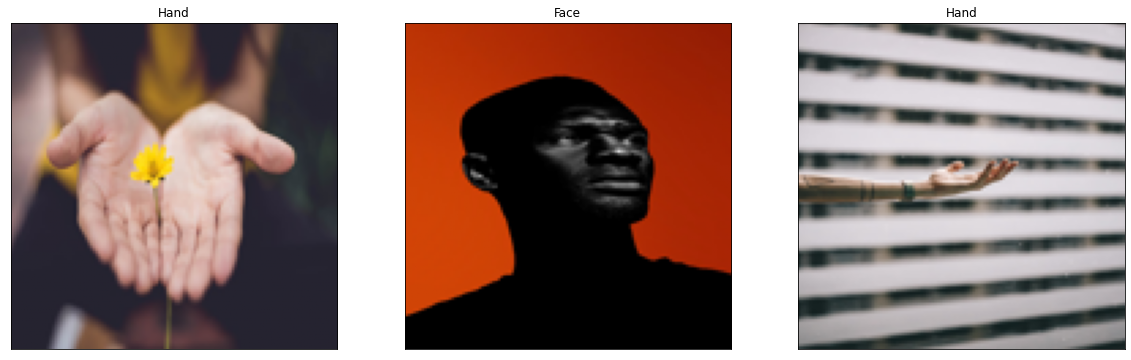

In [14]:
fig, ax = plt.subplots(1, 3, figsize=(20, 6))
for i in range(3):
    ax[i].imshow(X_train[i])
    ax[i].set_xticks([])
    ax[i].set_yticks([])
    ax[i].set_title(classes[int(y_train[i])])

## Getting pretrained VGG16 model

In [15]:
epochs = int(input("Enter number of Epochs to train on:- "))

Enter number of Epochs to train on:- 3


In [16]:

model = train_modelVGG16(classes, X_train, X_test, y_train, y_test, epochs, resize_shape, verbose=1)


Epoch 1/3
1/1 [==============================] - 1s 562ms/step - loss: 0.8230 - accuracy: 0.4545 - val_loss: 0.7528 - val_accuracy: 0.6667
Epoch 2/3
1/1 [==============================] - 0s 227ms/step - loss: 0.5887 - accuracy: 0.5455 - val_loss: 0.6931 - val_accuracy: 0.6667
Epoch 3/3
1/1 [==============================] - 0s 231ms/step - loss: 0.4342 - accuracy: 0.9091 - val_loss: 0.5557 - val_accuracy: 0.6667


In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 3, 3, 512)         14714688  
_________________________________________________________________
flatten (Flatten)            (None, 4608)              0         
_________________________________________________________________
dense (Dense)                (None, 2)                 9218      
Total params: 14,723,906
Trainable params: 9,218
Non-trainable params: 14,714,688
_________________________________________________________________


## Plot of accuracy and losses V/S Epochs

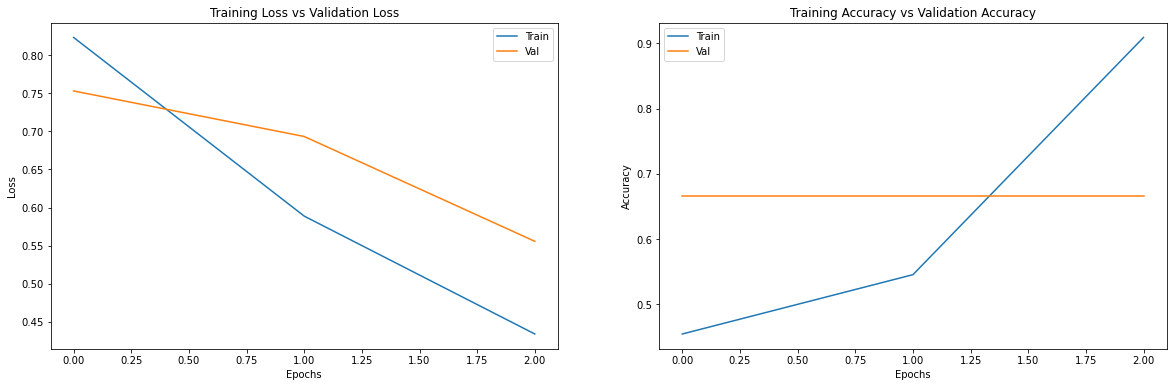

In [18]:
fig, axs = plt.subplots(1, 2, figsize=(20,6))
axs[0].plot(model.history.history['loss'])
axs[0].plot(model.history.history['val_loss'])
axs[0].title.set_text('Training Loss vs Validation Loss')
axs[0].set_xlabel('Epochs')
axs[0].set_ylabel('Loss')
axs[0].legend(['Train','Val'])
axs[1].plot(model.history.history['accuracy'])
axs[1].plot(model.history.history['val_accuracy'])
axs[1].title.set_text('Training Accuracy vs Validation Accuracy')
axs[1].set_xlabel('Epochs')
axs[1].set_ylabel('Accuracy')
axs[1].legend(['Train', 'Val'])

## Predictions of the Model

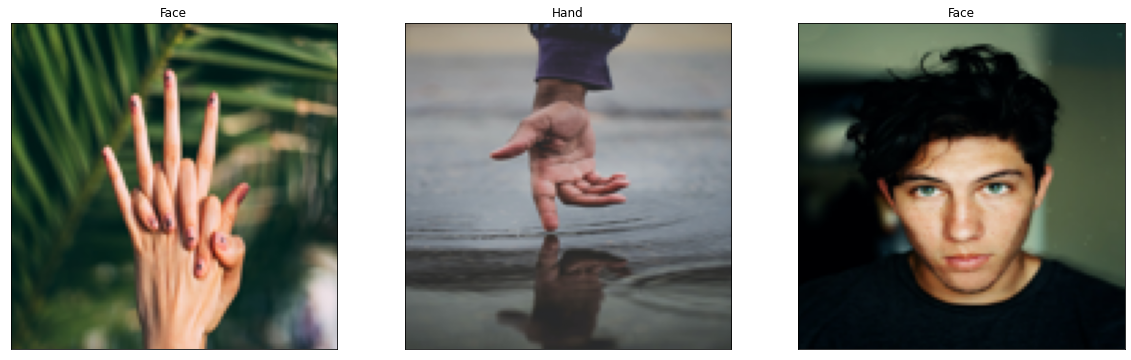

In [19]:
y_pred = model.predict(X_test)

if len(X_test) <= 3:
    no_plots = len(X_test)
else:
    no_plots = 3
fig, ax = plt.subplots(1, no_plots, figsize=(20, 6))
for idx, img in enumerate(X_test[:3]):
    if len(X_test) == 1:
        ax.imshow(img)
        ax.set_xticks([])
        ax.set_yticks([])
        ax.set_title(classes[np.argmax(y_pred[idx])]) 
    else:
        ax[idx].imshow(img)
        ax[idx].set_xticks([])
        ax[idx].set_yticks([])
        ax[idx].set_title(classes[np.argmax(y_pred[idx])])
 

In [20]:
model.evaluate(X_test, y_test)

1/1 [==============================] - 0s 2ms/step - loss: 0.5557 - accuracy: 0.6667


[0.5556911826133728, 0.6666666865348816]

## Real time Web-Cam prediction

In [21]:
img_name = "Img_from_Cam.png"
resize_shape = resize_shape
image_snapper_video(resize_shape, model, classes)

## Give a feedback

In [24]:
feedback = input("Please give us a feedback for further improvements:- ")

Please give us a feedback for further improvements:- Nice!!!


## Add the details to the database and show the summary

In [25]:
database_manager(classes, images_per_class, epochs, model, feedback, X_test, y_test)

Classes  were used and 7 images per class was downloaded. 
Model was trained on 3 epochs and the test accuracy was : 0.6666666865348816


## Display all the Records

In [26]:

#   Create a Database or connect to one   
conn = sqlite3.connect('Model_history.db')

#   Create a cursor
c = conn.cursor()


#    Query the Database
c.execute("SELECT *, oid FROM addresses")
records = c.fetchall()
print(records)
conn.close()

[('Laptop and Shirt', 6, 3, 0.5, 'Damn!!', 1), ('Face and Hand', 7, 3, 0.6666666865348816, 'Ohlallaa!!', 2), ('Face and Hand', 7, 3, 0.6666666865348816, 'Nice!!!', 3)]
